# GAN

__["Generative Adversarial Nets"](https://papers.nips.cc/paper/2014/file/5ca3e9b122f61f8f06494c97b1afccf3-Paper.pdf)__

_Yann LeCun: "The most interesting idea in the last 10 years in Machine Learning."_

## Motivation

How can we generate data when the __pdf is intractable__ at all?

Don't model the pdf explicitly, __learn the pdf implicitly__:

<img src="images/gm_taxonomy.png" width="600pt"/>

To this aim, define a new target: __maximize indistinguishability__ of generated samples.

## GAN architecture

Recipe for samples generation:

- __generate a latent__ vector from a simple distribution;
- __transform it__ in the target distribution.

Recipe for training, use two ANN players in this game:

- _generator (G)_: generates fake images (like a decoder) to fool D;
- _discriminator (D)_: binary classifier.distinguishing fakes (0) from real images (1).

<img src="images/gan.png" width="600pt"/>

## GAN loss

Two opposite forces work in the GAN: D and G. It is a min-max problem:

$$\Large
\min_G\max_D V(D,G) = \min_G\max_D \mathbb{E}_x[\log D(x)] + \mathbb{E}_z[1-\log D(G(z))]
$$

where in the maximization step $\max_D$:

- the first term forces $D$ to recognize reals;
- the second term forces $D$ to recognize fakes;

whilst in the minimization step $\min_G$:

- the first term is not considered (it is a constant wrt $G$);
- the second term forces $G$ to generate better fakes.

## The minimax game


Data | Classifier | Gradients
:-: | :-: | :-:
<img src="images/GAN_ex_data.png" width="300pt"/> | <img src="images/GAN_ex_D.png" width="300pt"/> | <img src="images/GAN_ex_grad.png" width="300pt"/>

Play with GANs [here](https://poloclub.github.io/ganlab/).

In [6]:
%load_ext autoreload

Generator parameters: 1820
Discriminator parameters: 1625


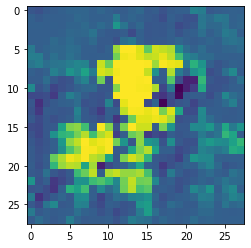

Epoch: 1, losses (G,Dtr,Dte): 0.6928749792992688, 0.6934709039324128, 0.692738088452892, 


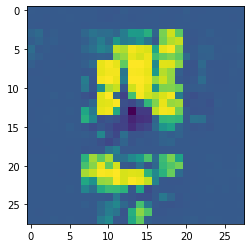

Epoch: 2, losses (G,Dtr,Dte): 0.6974119574530546, 0.6914871419543651, 0.7009864836741405, 


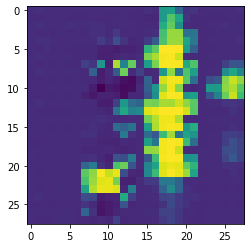

Epoch: 3, losses (G,Dtr,Dte): 0.7119164273682942, 0.6871222826336493, 0.6427544685685711, 


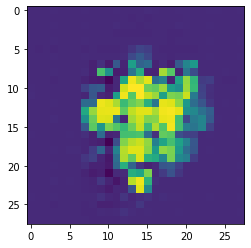

Epoch: 4, losses (G,Dtr,Dte): 0.7388911624071695, 0.6676426772623937, 0.6422277616847093, 


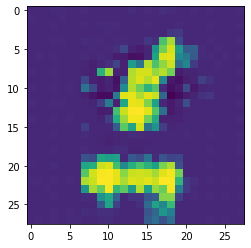

Epoch: 5, losses (G,Dtr,Dte): 0.9432959434574347, 0.5600111922348486, 0.7258113239221512, 


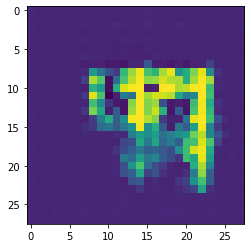

Epoch: 6, losses (G,Dtr,Dte): 1.1736675863708261, 0.49668955683771737, 0.46876405207974137, 


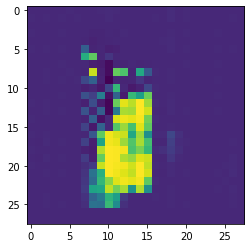

Epoch: 7, losses (G,Dtr,Dte): 1.4014935250094196, 0.4017325442181086, 0.3875312856428183, 


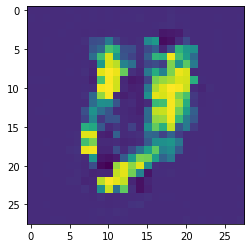

Epoch: 8, losses (G,Dtr,Dte): 1.713453664962671, 0.33138008714357675, 0.21686272256693262, 


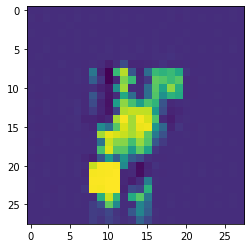

Epoch: 9, losses (G,Dtr,Dte): 2.2491588406979655, 0.20583405633216728, 0.11148471034066693, 


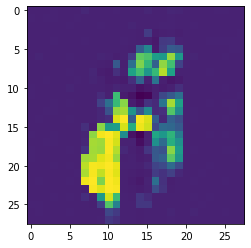

Epoch: 10, losses (G,Dtr,Dte): 2.5135772601882023, 0.17758361535317607, 0.13307905842544168, 


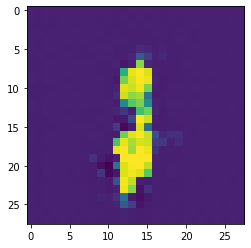

Epoch: 11, losses (G,Dtr,Dte): 2.7715303591573672, 0.1437327016287966, 0.09601909026598475, 


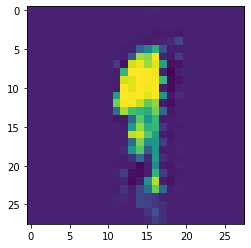

Epoch: 12, losses (G,Dtr,Dte): 3.1794077883015817, 0.10564894314859309, 0.129057245601894, 


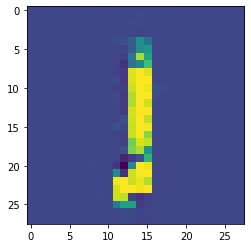

Epoch: 13, losses (G,Dtr,Dte): 3.5593124963581433, 0.058978469340380896, 0.04183001711869695, 


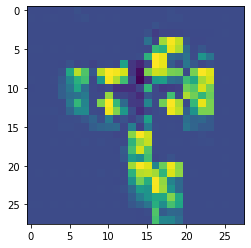

Epoch: 14, losses (G,Dtr,Dte): 3.5213129719945666, 0.10659263515249212, 0.23605660463024855, 


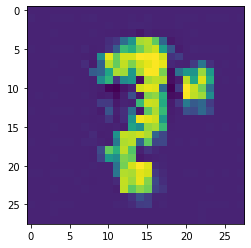

Epoch: 15, losses (G,Dtr,Dte): 2.79334389547041, 0.22558925691634607, 0.1819618823137253, 


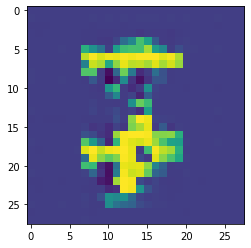

Epoch: 16, losses (G,Dtr,Dte): 3.1074483336161958, 0.13973485360910962, 0.07189558436916133, 


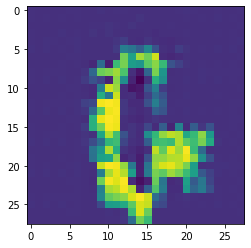

Epoch: 17, losses (G,Dtr,Dte): 3.4298097627249353, 0.09350200951782497, 0.26320841775578296, 


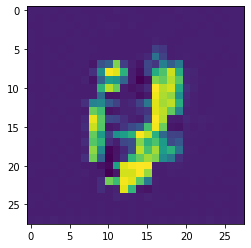

Epoch: 18, losses (G,Dtr,Dte): 2.9636048966252218, 0.15353732649236917, 0.09646371797106829, 


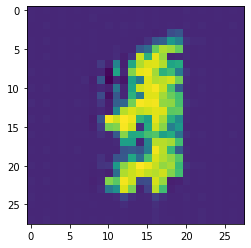

Epoch: 19, losses (G,Dtr,Dte): 3.4406933042286303, 0.08409528123504763, 0.03280890890201376, 


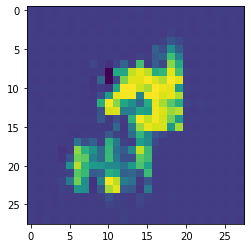

Epoch: 20, losses (G,Dtr,Dte): 4.070988381595246, 0.0580939229815823, 0.17931016470501376, 


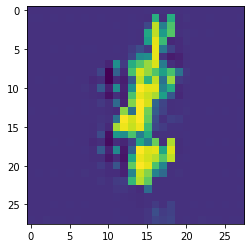

Epoch: 21, losses (G,Dtr,Dte): 3.6456491715872468, 0.08397257459193055, 0.10809045636160358, 


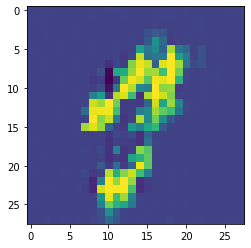

Epoch: 22, losses (G,Dtr,Dte): 4.402622416202448, 0.04544450624410047, 0.07192139595058883, 


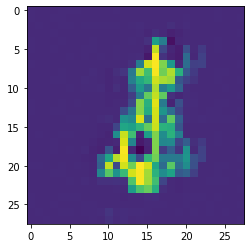

Epoch: 23, losses (G,Dtr,Dte): 4.042786536821678, 0.0837667033906335, 0.07785226475850791, 


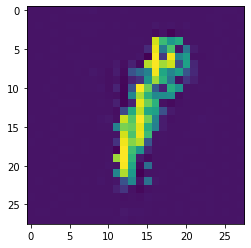

Epoch: 24, losses (G,Dtr,Dte): 3.803486822002224, 0.07642989782298774, 0.05362383167075503, 


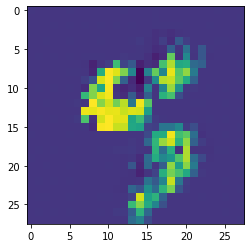

Epoch: 25, losses (G,Dtr,Dte): 4.076743781693708, 0.06431728927815743, 0.03600791775900277, 


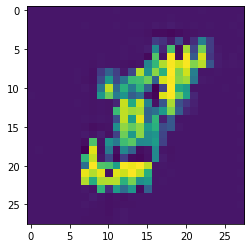

Epoch: 26, losses (G,Dtr,Dte): 3.852553517452435, 0.09588956017630981, 0.039017970068676834, 


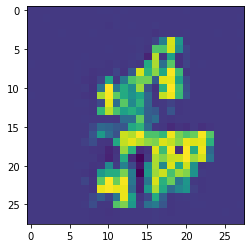

Epoch: 27, losses (G,Dtr,Dte): 4.038317032460211, 0.061503277032642065, 0.11525904382490049, 


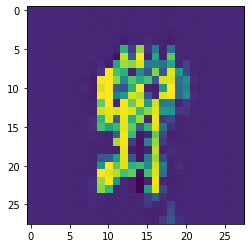

Epoch: 28, losses (G,Dtr,Dte): 4.547333342688424, 0.06261361607296793, 0.027446904264176918, 


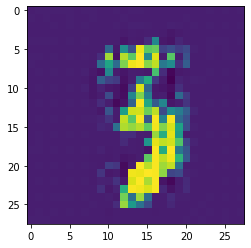

Epoch: 29, losses (G,Dtr,Dte): 4.668304594595041, 0.03587171489567454, 0.014457725663224508, 


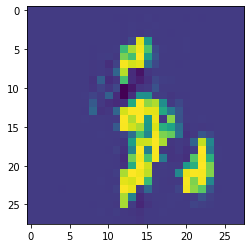

Epoch: 30, losses (G,Dtr,Dte): 4.633801498901107, 0.057463202460322466, 0.03647186900162773, 


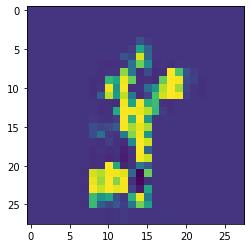

Epoch: 31, losses (G,Dtr,Dte): 5.34834070233648, 0.03508124721000966, 0.031099017762881556, 


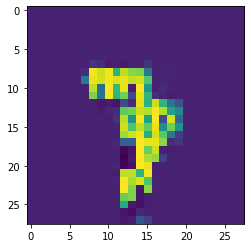

Epoch: 32, losses (G,Dtr,Dte): 4.801565049299553, 0.039500590591472505, 0.07950173664814347, 


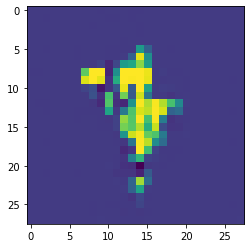

Epoch: 33, losses (G,Dtr,Dte): 5.37958169873081, 0.012783607294627113, 0.012462069184792222, 


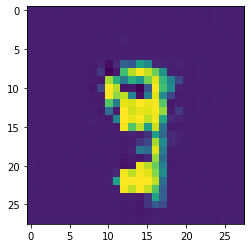

Epoch: 34, losses (G,Dtr,Dte): 5.251707139554054, 0.06596610682926747, 0.014782390038180312, 


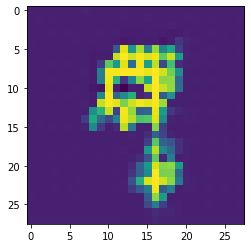

Epoch: 35, losses (G,Dtr,Dte): 4.962524415587565, 0.07063841281050662, 0.09957915265706314, 


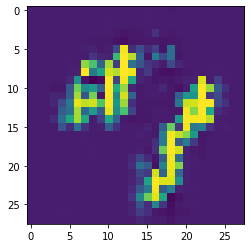

Epoch: 36, losses (G,Dtr,Dte): 4.390869846603255, 0.13348967331682027, 0.11970033586784533, 


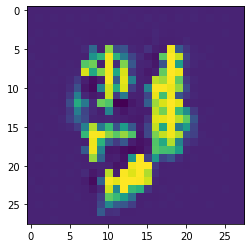

Epoch: 37, losses (G,Dtr,Dte): 4.27024876499481, 0.1129140678583694, 0.17011002168818645, 


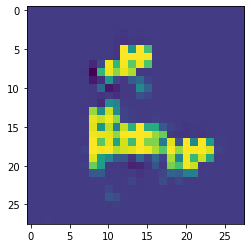

Epoch: 38, losses (G,Dtr,Dte): 4.733040550370206, 0.08265953136608997, 0.017158345371235614, 


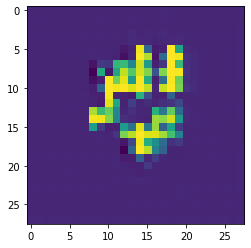

Epoch: 39, losses (G,Dtr,Dte): 4.6494848819683865, 0.038409960697834956, 0.025262223397957008, 


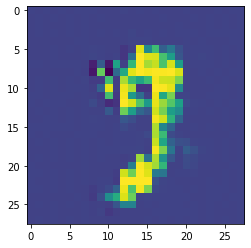

Epoch: 40, losses (G,Dtr,Dte): 4.976328221846745, 0.09100957650009037, 0.12956639742300768, 


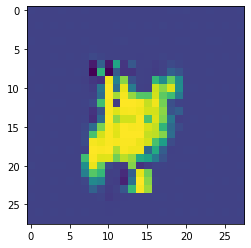

Epoch: 41, losses (G,Dtr,Dte): 4.738045870113983, 0.08987868400906195, 0.2243318594280322, 


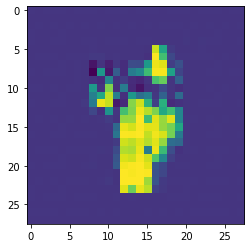

Epoch: 42, losses (G,Dtr,Dte): 4.654716445565986, 0.09071474475438582, 0.038050035717689494, 


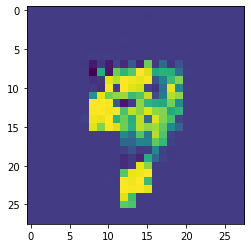

Epoch: 43, losses (G,Dtr,Dte): 4.750074827340621, 0.03377056008302617, 0.021787084692460337, 


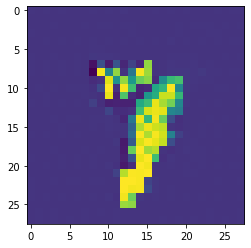

Epoch: 44, losses (G,Dtr,Dte): 5.081023239886075, 0.029151708282568037, 0.024942488110013258, 


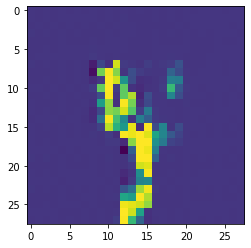

Epoch: 45, losses (G,Dtr,Dte): 5.28877225842303, 0.0198514335380464, 0.09599357673744108, 


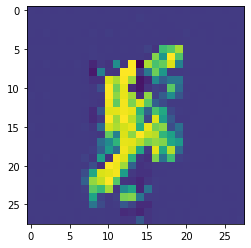

Epoch: 46, losses (G,Dtr,Dte): 5.695188676370487, 0.05206576636222292, 0.03186456788224495, 


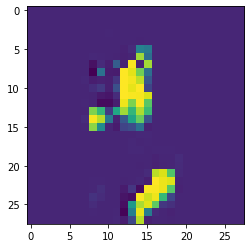

Epoch: 47, losses (G,Dtr,Dte): 5.062969769369056, 0.042899509608989576, 0.015913478429518214, 


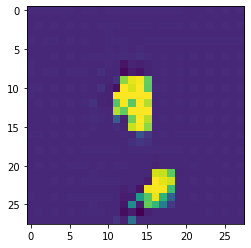

Epoch: 48, losses (G,Dtr,Dte): 6.061106763668914, 0.008557475006699547, 0.004276784773746203, 


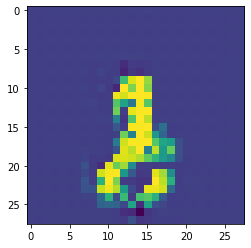

Epoch: 49, losses (G,Dtr,Dte): 7.59326713374937, 0.006049016761829144, 0.0455608495279767, 


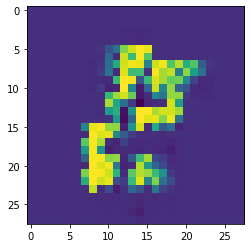

Epoch: 50, losses (G,Dtr,Dte): 6.262416469008683, 0.06246358562447776, 0.30249167497085916, 


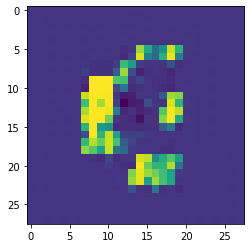

Epoch: 51, losses (G,Dtr,Dte): 5.201309815525755, 0.045674758787795124, 0.03967336168702526, 


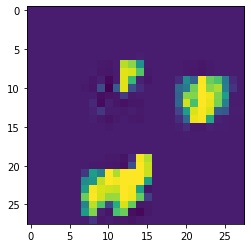

Epoch: 52, losses (G,Dtr,Dte): 5.753800461668449, 0.049135464740310685, 0.013760299285411075, 


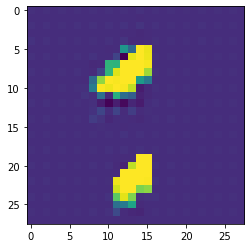

Epoch: 53, losses (G,Dtr,Dte): 6.6551738133562655, 0.00795216265582613, 0.0028479019165851744, 


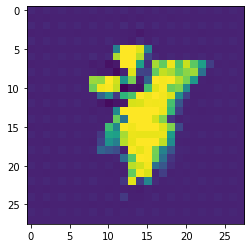

Epoch: 54, losses (G,Dtr,Dte): 6.9734973485535905, 0.028469822704403867, 0.42257595456140057, 


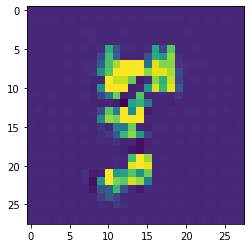

Epoch: 55, losses (G,Dtr,Dte): 5.549543714853746, 0.04736051541630989, 0.024214895160358612, 


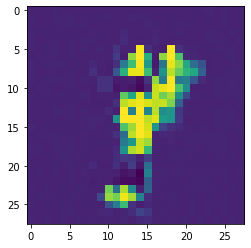

Epoch: 56, losses (G,Dtr,Dte): 5.061318905114619, 0.0489467541892717, 0.18913974323470123, 


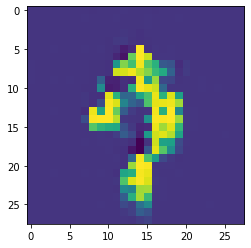

Epoch: 57, losses (G,Dtr,Dte): 4.28623079732537, 0.07771988771756543, 0.05513430228990734, 


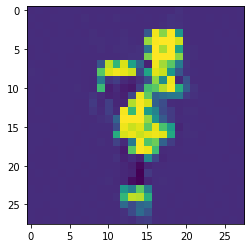

Epoch: 58, losses (G,Dtr,Dte): 4.180220030835951, 0.09767023773331727, 0.05657223149374792, 


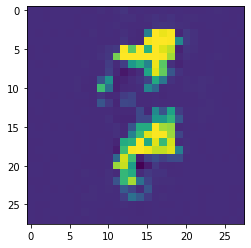

Epoch: 59, losses (G,Dtr,Dte): 4.3459889187868725, 0.09514477706230334, 0.08703041154962436, 


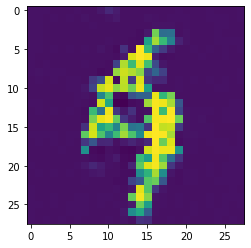

Epoch: 60, losses (G,Dtr,Dte): 4.39943898207089, 0.09479698755972978, 0.04918040604490763, 


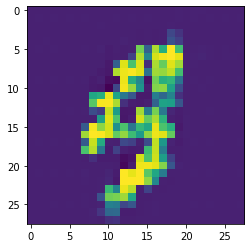

Epoch: 61, losses (G,Dtr,Dte): 4.272109506353895, 0.12027983397428098, 0.14919657478476786, 


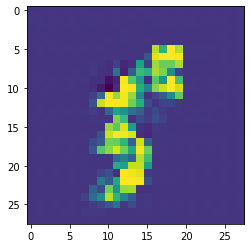

Epoch: 62, losses (G,Dtr,Dte): 4.391048223860483, 0.11626582917050401, 0.09924871745003257, 


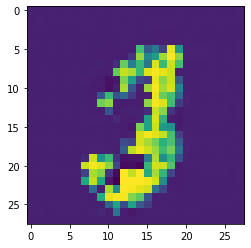

Epoch: 63, losses (G,Dtr,Dte): 4.769549562478625, 0.053764378940905015, 0.03204892591163991, 


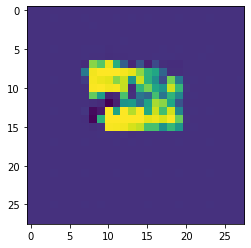

Epoch: 64, losses (G,Dtr,Dte): 4.9183059122516655, 0.04064534212808127, 0.004767721108083797, 


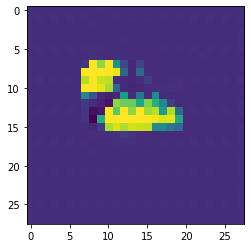

Epoch: 65, losses (G,Dtr,Dte): 6.793481470933601, 0.003065633423388977, 0.0010417157907007784, 


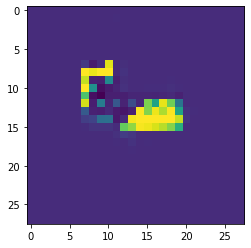

Epoch: 66, losses (G,Dtr,Dte): 7.177837636679221, 0.0015335990041662074, 0.0017129480679353379, 


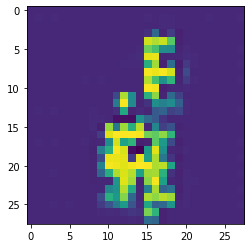

Epoch: 67, losses (G,Dtr,Dte): 6.549627298231064, 0.044202241004030564, 0.018525759713237833, 


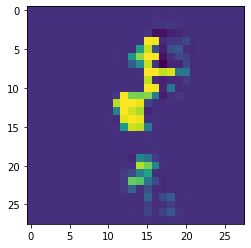

Epoch: 68, losses (G,Dtr,Dte): 5.690492103221828, 0.01679040480746147, 0.003405414535782662, 


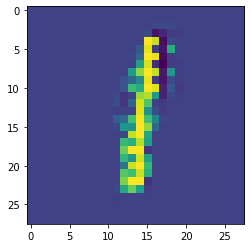

Epoch: 69, losses (G,Dtr,Dte): 5.761523990997119, 0.021440922053714992, 0.050666326541727216, 


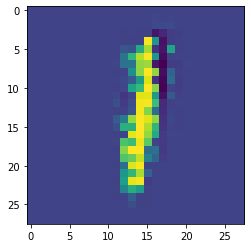

Epoch: 70, losses (G,Dtr,Dte): 4.88900352477519, 0.049251974707949404, 0.03204206370149448, 


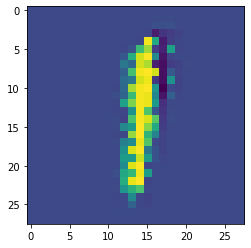

Epoch: 71, losses (G,Dtr,Dte): 4.772548185736894, 0.024500505888396733, 0.03076177968341074, 


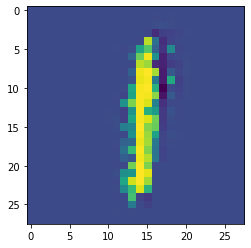

Epoch: 72, losses (G,Dtr,Dte): 5.100416446799662, 0.02351133290820431, 0.018378855642761774, 


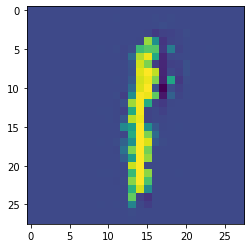

Epoch: 73, losses (G,Dtr,Dte): 5.334029719519463, 0.018781051778891923, 0.017375872004777193, 


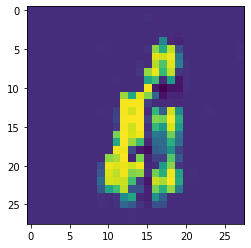

Epoch: 74, losses (G,Dtr,Dte): 6.305060731576704, 0.0665337340344664, 0.007646944809847387, 


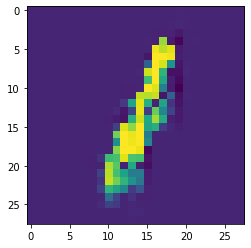

Epoch: 75, losses (G,Dtr,Dte): 5.3605142465786635, 0.021422688129214273, 0.014040783845528865, 


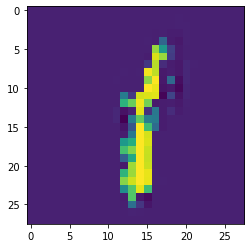

Epoch: 76, losses (G,Dtr,Dte): 5.762745243908245, 0.016714449395453666, 0.0053602655130515625, 


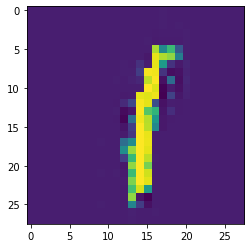

Epoch: 77, losses (G,Dtr,Dte): 6.76923673442686, 0.003516975042630428, 0.0023505510589935386, 


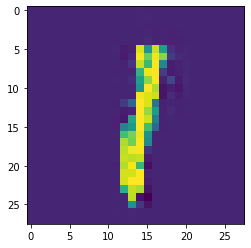

Epoch: 78, losses (G,Dtr,Dte): 5.599851997422257, 0.02763700268436983, 0.03312434235908043, 


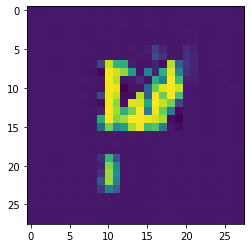

Epoch: 79, losses (G,Dtr,Dte): 5.813292191099765, 0.06452823895508045, 0.042816120609166515, 


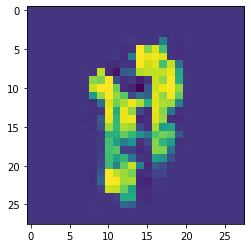

Epoch: 80, losses (G,Dtr,Dte): 5.482723810207615, 0.18814149869383492, 0.16244017469228073, 


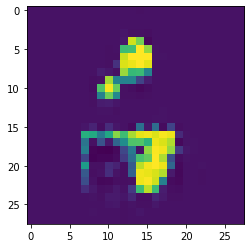

Epoch: 81, losses (G,Dtr,Dte): 5.906389737688402, 0.051683144362545064, 0.030245965558762668, 


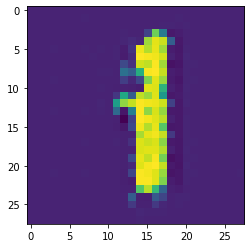

Epoch: 82, losses (G,Dtr,Dte): 5.700179540526384, 0.03374707086909332, 0.006393107607900269, 


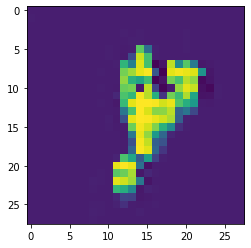

Epoch: 83, losses (G,Dtr,Dte): 5.951849621496221, 0.03650676634404431, 0.013871279845435385, 


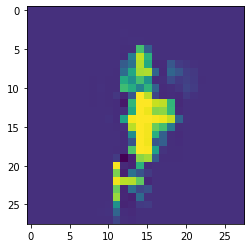

Epoch: 84, losses (G,Dtr,Dte): 5.96457969456085, 0.014560438903107091, 0.004713839214905217, 


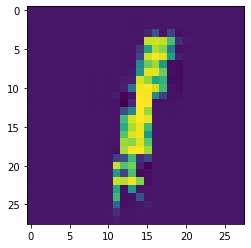

Epoch: 85, losses (G,Dtr,Dte): 5.793966119731667, 0.02351149640253231, 0.030974302908026014, 


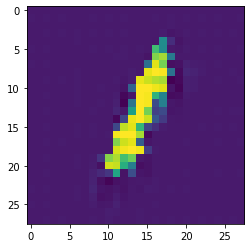

Epoch: 86, losses (G,Dtr,Dte): 5.224478806005612, 0.040536926624876235, 0.00798574362212835, 


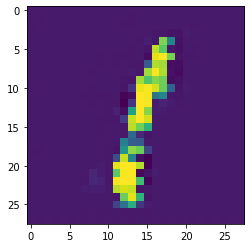

Epoch: 87, losses (G,Dtr,Dte): 5.794932705507096, 0.020980262692978563, 0.018999581300849274, 


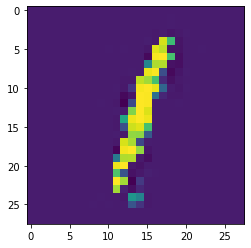

Epoch: 88, losses (G,Dtr,Dte): 5.562210222042954, 0.016893951816757125, 0.010564128853196974, 


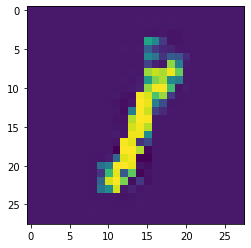

Epoch: 89, losses (G,Dtr,Dte): 5.9472637792894325, 0.029831203560344317, 0.011012257340773466, 


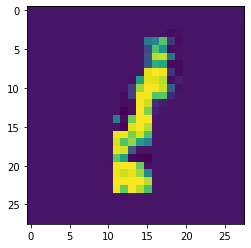

Epoch: 90, losses (G,Dtr,Dte): 5.921617385071478, 0.0308922648290619, 0.0758989847911771, 


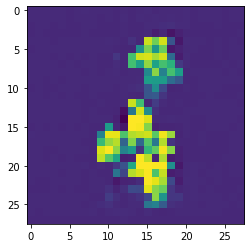

Epoch: 91, losses (G,Dtr,Dte): 5.847942436554793, 0.0948293904404291, 0.2538815446458994, 


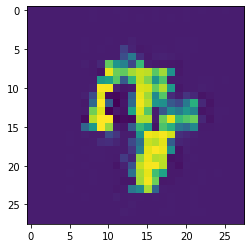

Epoch: 92, losses (G,Dtr,Dte): 5.048152008703522, 0.153405769917268, 0.04894196678688572, 


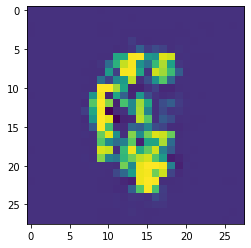

Epoch: 93, losses (G,Dtr,Dte): 4.672889381329388, 0.08517527850746894, 0.05005231639666922, 


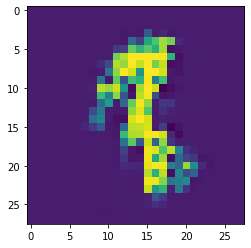

Epoch: 94, losses (G,Dtr,Dte): 4.821597528737237, 0.1519235530322088, 0.13589537736906368, 


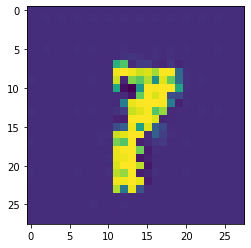

Epoch: 95, losses (G,Dtr,Dte): 5.039951696578882, 0.08890584686191193, 0.03254869314219067, 


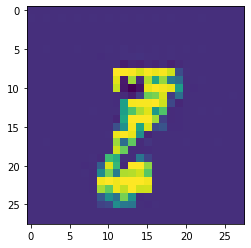

Epoch: 96, losses (G,Dtr,Dte): 5.553463233051016, 0.02990827454892702, 0.017148441716637108, 


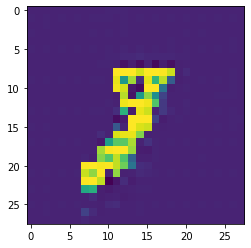

Epoch: 97, losses (G,Dtr,Dte): 6.113714332773742, 0.024050505709457288, 0.0048732604263469, 


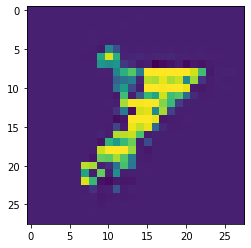

Epoch: 98, losses (G,Dtr,Dte): 7.209135678531265, 0.00649450219564958, 0.00945379415632279, 


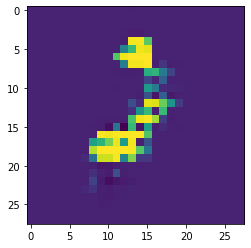

Epoch: 99, losses (G,Dtr,Dte): 7.392200125051714, 0.007526640649041068, 0.0018579261232629807, 


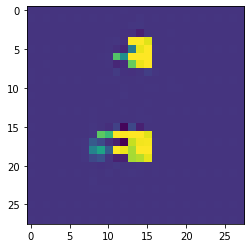

Epoch: 100, losses (G,Dtr,Dte): 7.939157177898675, 0.0015858899908114735, 0.0009039711710165705, 


In [182]:
%autoreload

from GAN import train

# Training a GAN on MNIST:
generator, discriminator, fakes, \
train_generator_losses, train_discriminator_losses, test_discriminator_losses = train(
    epochs=100,
    batch_size=64,
    lr_generator=1e-3,
    lr_discriminator=3e-4,
)

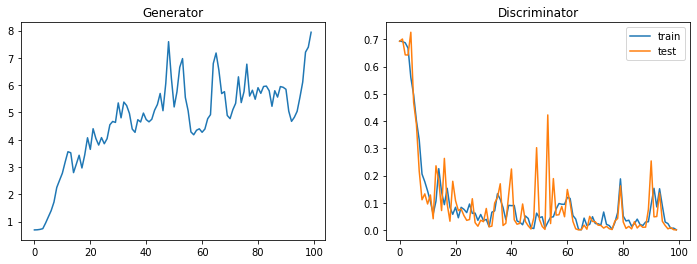

In [183]:
from matplotlib import pyplot as plt

_, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(train_generator_losses)
ax[0].set_title('Generator')
ax[1].plot(train_discriminator_losses)
ax[1].plot(test_discriminator_losses)
ax[1].set_title('Discriminator')
ax[1].legend(['train','test']);

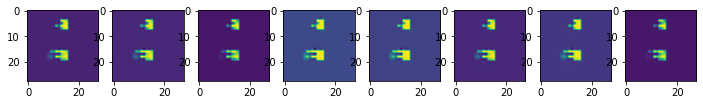

In [184]:
import torch

# Generating data:
n = 8
xfake = generator(torch.rand((n,2,2,2)))
_, ax = plt.subplots(1, n, figsize=(12,4))
with torch.no_grad():
    for i in range(n):
        img = xfake[i]
        ax[i].imshow(img.permute(1,2,0))

## Considerations

The training is __really unstable__:

- convergence is proved in the paper...
- ...but it is difficult to be achieved in practice;
- mode collapse makes makes the generator to sample a small space part;
- vanishing gradients stop training on one or the other network.

After the first proposed version, many improvements have been proposed.  
__The Wasserstein loss faces these problems in the WGAN.__